<a href="https://colab.research.google.com/github/irfanrangga/statistika-Irfanr/blob/main/Tubes_statistika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
url = "https://raw.githubusercontent.com/irfanrangga/statistika-Irfanr/main/Video_Games_Sales_as_at_22_Dec_2016.csv"
df = pd.read_csv(url)

df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Informasi awal data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [ ]:
# Check for missing value
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [ ]:
# Cek apakah terdapat data yang kosong (NaN)
print("Year_of_Release:")
print(df['Year_of_Release'].unique())

print("\nCritic_Score:")
print(df['Critic_Score'].unique())

print("\nCritic_Count:")
print(df['Critic_Count'].unique())

# Isi data NaN dengan Mean
df['Year_of_Release'] = df['Year_of_Release'].fillna(2008).astype('int')
df['Critic_Score'] = df['Critic_Score'].fillna(68.96).astype('float64')
df['Critic_Count'] = df['Critic_Count'].fillna(26.36).astype('float64')
df['User_Score'] = df['User_Score'].fillna(7.12).astype('float64')
df['User_Count'] = df['User_Count'].fillna(49).astype('int')

Year_of_Release:
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983. 2020. 2017.]

Critic_Score:
[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]

Critic_Count:
[ 51.  nan  73.  65.  41.  80.  64.  63.  45.  33.  50.  58.  62.  37.
  54.  81.  89.  21. 100.  39.  56.  66.  57.  86.  74.  16.  82.  67.
  29.  15.  70.  99.  20.  87.  23.  24.  10.  27.  42.  91.  53.  75.
  46.  84.  38.  12.  90.  97.  44. 105.  77.  68.  28.  94.  96.  61.
  22.  88.  47.  98.  85.  13.   8.  95.  17.  35.  19.  48.  14. 113.
  83.  72.  30.

In [ ]:
# Check for duplicate date
m = df.duplicated(['Name','Platform','Year_of_Release','Genre','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales','Critic_Score','Critic_Count','User_Score','User_Count','Developer','Rating'])
df[m]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating


In [ ]:
# Update data
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.00,51.00,8.00,322,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.96,26.36,7.12,49,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.00,73.00,8.30,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.00,73.00,8.00,192,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68.96,26.36,7.12,49,NaN,NaN


In [ ]:
# Check for missing value
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release       0
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score            0
User_Count            0
Developer          6623
Rating             6769
dtype: int64

In [ ]:
# Menghapus baris yang terdapat data NaN dan mengatur ulang indeks
df.dropna(inplace=True,ignore_index=True)

In [ ]:
# Check for missing value
df.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [ ]:
# Summary statistics
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,9943.000000,9943.000000,9943.000000,9943.000000,9943.000000,9943.000000,9943.000000,9943.000000,9943.000000,9943.000000
mean,2007.589762,0.317810,0.182042,0.045802,0.064390,0.610286,68.973577,26.419942,7.125674,134.810520
std,4.065641,0.821062,0.583198,0.240897,0.228311,1.662339,12.549989,17.115897,1.302609,492.462594
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2005.000000,0.050000,0.010000,0.000000,0.010000,0.080000,63.000000,14.000000,6.800000,14.000000
50%,2008.000000,0.120000,0.040000,0.000000,0.020000,0.210000,68.960000,26.360000,7.120000,49.000000
75%,2010.000000,0.300000,0.150000,0.000000,0.050000,0.560000,77.000000,32.000000,8.000000,50.000000
max,2020.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


In [ ]:
df[['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score','Critic_Count', 'User_Score', 'User_Count']].mode()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,2008,0.0,0.0,0.0,0.01,0.02,68.96,26.36,7.12,49


In [ ]:
# Variance
df[['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score','Critic_Count', 'User_Score', 'User_Count']].var()

Year_of_Release        16.529434
NA_Sales                0.674143
EU_Sales                0.340120
JP_Sales                0.058031
Other_Sales             0.052126
Global_Sales            2.763372
Critic_Score          157.502222
Critic_Count          292.953920
User_Score              1.696790
User_Count         242519.406258
dtype: float64

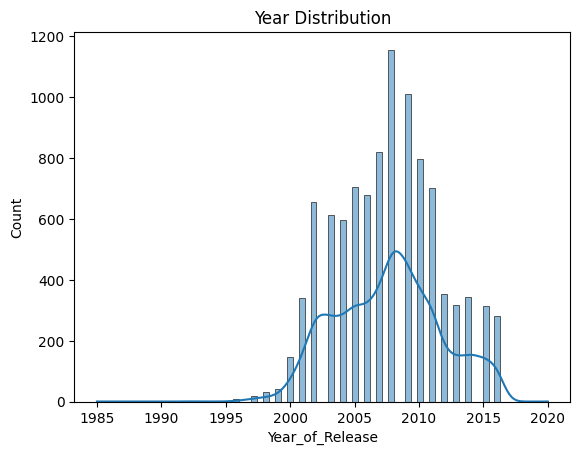

In [ ]:
# Visualize the distribution of numerical features
sns.histplot(df['Year_of_Release'].dropna(), kde=True)
plt.title('Year Distribution')
plt.show()


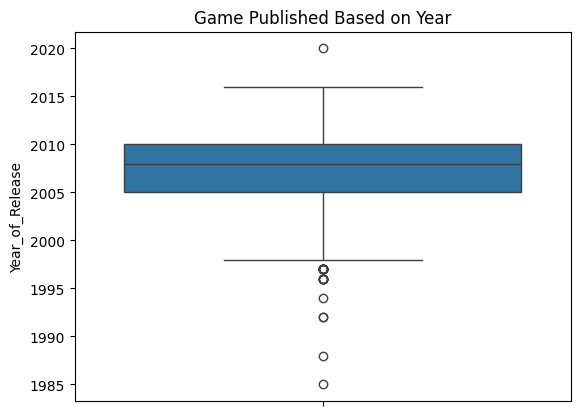

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322,Nintendo,E
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709,Nintendo,E
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192,Nintendo,E
3,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431,Nintendo,E
4,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129,Nintendo,E


In [ ]:
# Visualize 'Year_of_Release' distribution
sns.boxplot(df['Year_of_Release'])
plt.title('Game Published Based on Year')
plt.show()

# Handle outliers in 'Year_of_Release'
Q1 = df['Year_of_Release'].quantile(0.25)
Q3 = df['Year_of_Release'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outliers = (df['Year_of_Release'] < (Q1 - 1.5 * IQR)) | (df['Year_of_Release'] > (Q3 + 1.5 * IQR))

# Replace outliers with the median
df.loc[outliers, 'Year_of_Release'] = df['Year_of_Release'].median()

# Check the dataframe after handling outliers
df.head()

                 Year_of_Release  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Year_of_Release         1.000000 -0.017135  0.035577 -0.022161     0.038127   
NA_Sales               -0.017135  1.000000  0.836988  0.468012     0.725408   
EU_Sales                0.035577  0.836988  1.000000  0.520017     0.717651   
JP_Sales               -0.022161  0.468012  0.520017  1.000000     0.397889   
Other_Sales             0.038127  0.725408  0.717651  0.397889     1.000000   
Global_Sales            0.006002  0.954878  0.938032  0.613077     0.804970   
Critic_Score            0.021978  0.238433  0.218151  0.151983     0.196501   
Critic_Count            0.204965  0.291515  0.273603  0.180023     0.248349   
User_Score             -0.242518  0.084931  0.054817  0.124477     0.056518   
User_Count              0.174054  0.254612  0.291244  0.084817     0.247203   

                 Global_Sales  Critic_Score  Critic_Count  User_Score  \
Year_of_Release      0.006002      0.021978      0.204965

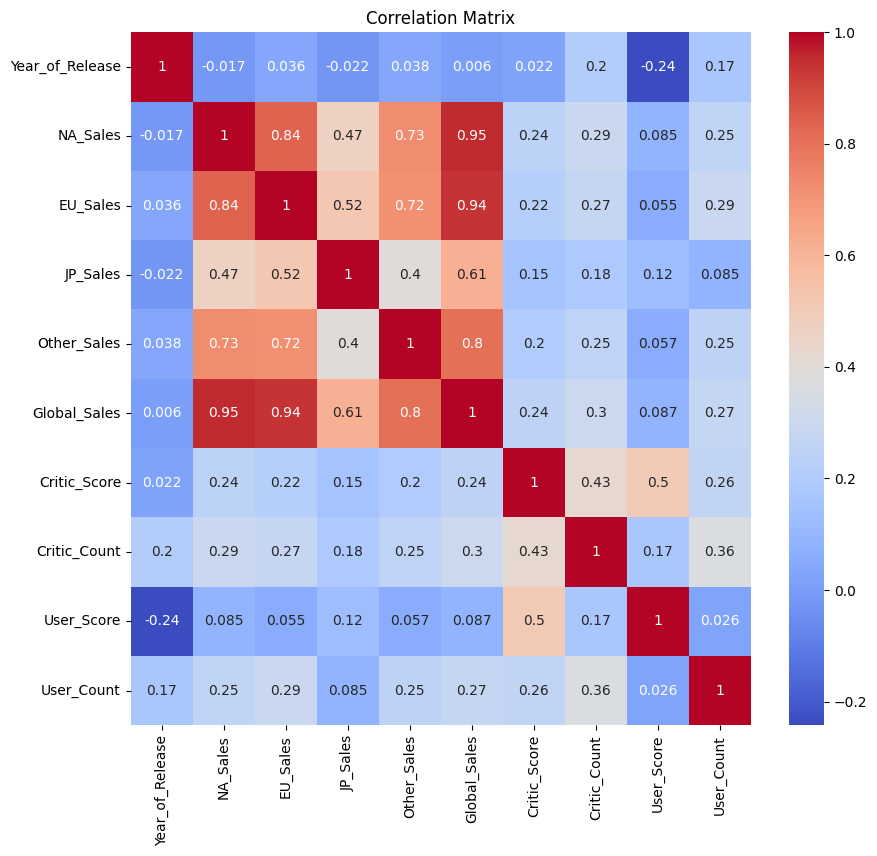

In [ ]:
df.drop(columns=['Name'], inplace=True)
df.drop(columns=['Platform'], inplace=True)
df.drop(columns=['Genre'], inplace=True)
df.drop(columns=['Publisher'], inplace=True)
df.drop(columns=['Developer'], inplace=True)
df.drop(columns=['Rating'], inplace=True)

# Compute the correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

# Plot the heatmap
plt.figure(figsize=(10, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
import statsmodels.api as sm

# Define the independent variables (features) and the dependent variable (target)
X = df[['NA_Sales', 'EU_Sales']]
y = df['Global_Sales']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 2.033e+05
Date:                Sun, 09 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:55:58   Log-Likelihood:                -590.54
No. Observations:                9943   AIC:                             1187.
Df Residuals:                    9940   BIC:                             1209.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0050      0.003      1.807      0.0

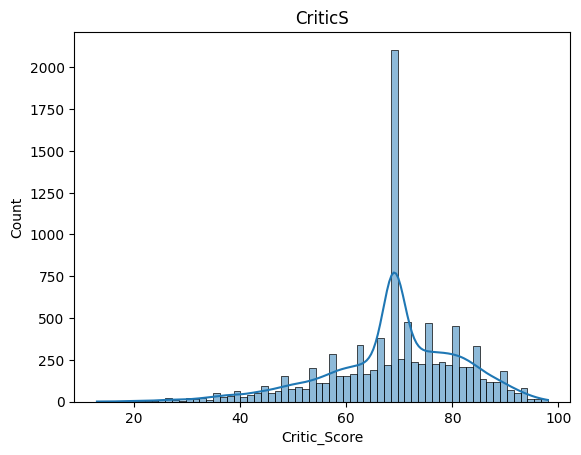

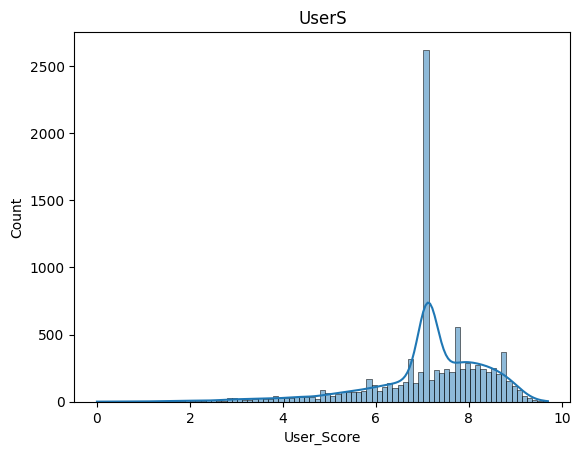

In [ ]:
sns.histplot(df['Critic_Score'].dropna(), kde=True)
plt.title('CriticS')
plt.show()

sns.histplot(df['User_Score'].dropna(), kde=True)
plt.title('UserS')
plt.show()

In [ ]:
from scipy import stats

# Separate the 'User_Score' data for Games that got critic score above 68 and below 68
CriticScore_Above_68 = df[df['Critic_Score'] >= 68] ['User_Score']
CriticScore_Under_68 = df[df['Critic_Score'] < 68] ['User_Score']

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(CriticScore_Above_68, CriticScore_Under_68)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Conclusion
if p_value < 0.05:
    print("We reject the null hypothesis. There is a significant difference in the mean 'User_Score' between Critic Score above 68 and Critic Score below 68.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference in the mean 'User_Score' between Critic Score above 68 and Critic Score below 68.")


T-statistic: 34.95146086950707
P-value: 1.551784181864561e-252
We reject the null hypothesis. There is a significant difference in the mean 'User_Score' between Critic Score above 68 and Critic Score below 68.
